# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.tree import plot_tree
from sklearn import datasets, linear_model, metrics

# Data Overview

### Import Data

In [2]:
df = pd.read_csv(r"C:\Users\jsrei\OneDrive\Desktop\Data Science\bikes_sharing.csv")

### Basic Functions

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


df.info() checks what percentage of data is missing from each variable

If it is more than 10% then do imputation(fill with median if numeric, fill with most common of a category if that feels correct, can also fill with other), if less than 10% then they can be removed

Ensure the datetime variable is of the data type date

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.describe(include = 'all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [6]:
df['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

# Data Cleaning

Drop Duplicates

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

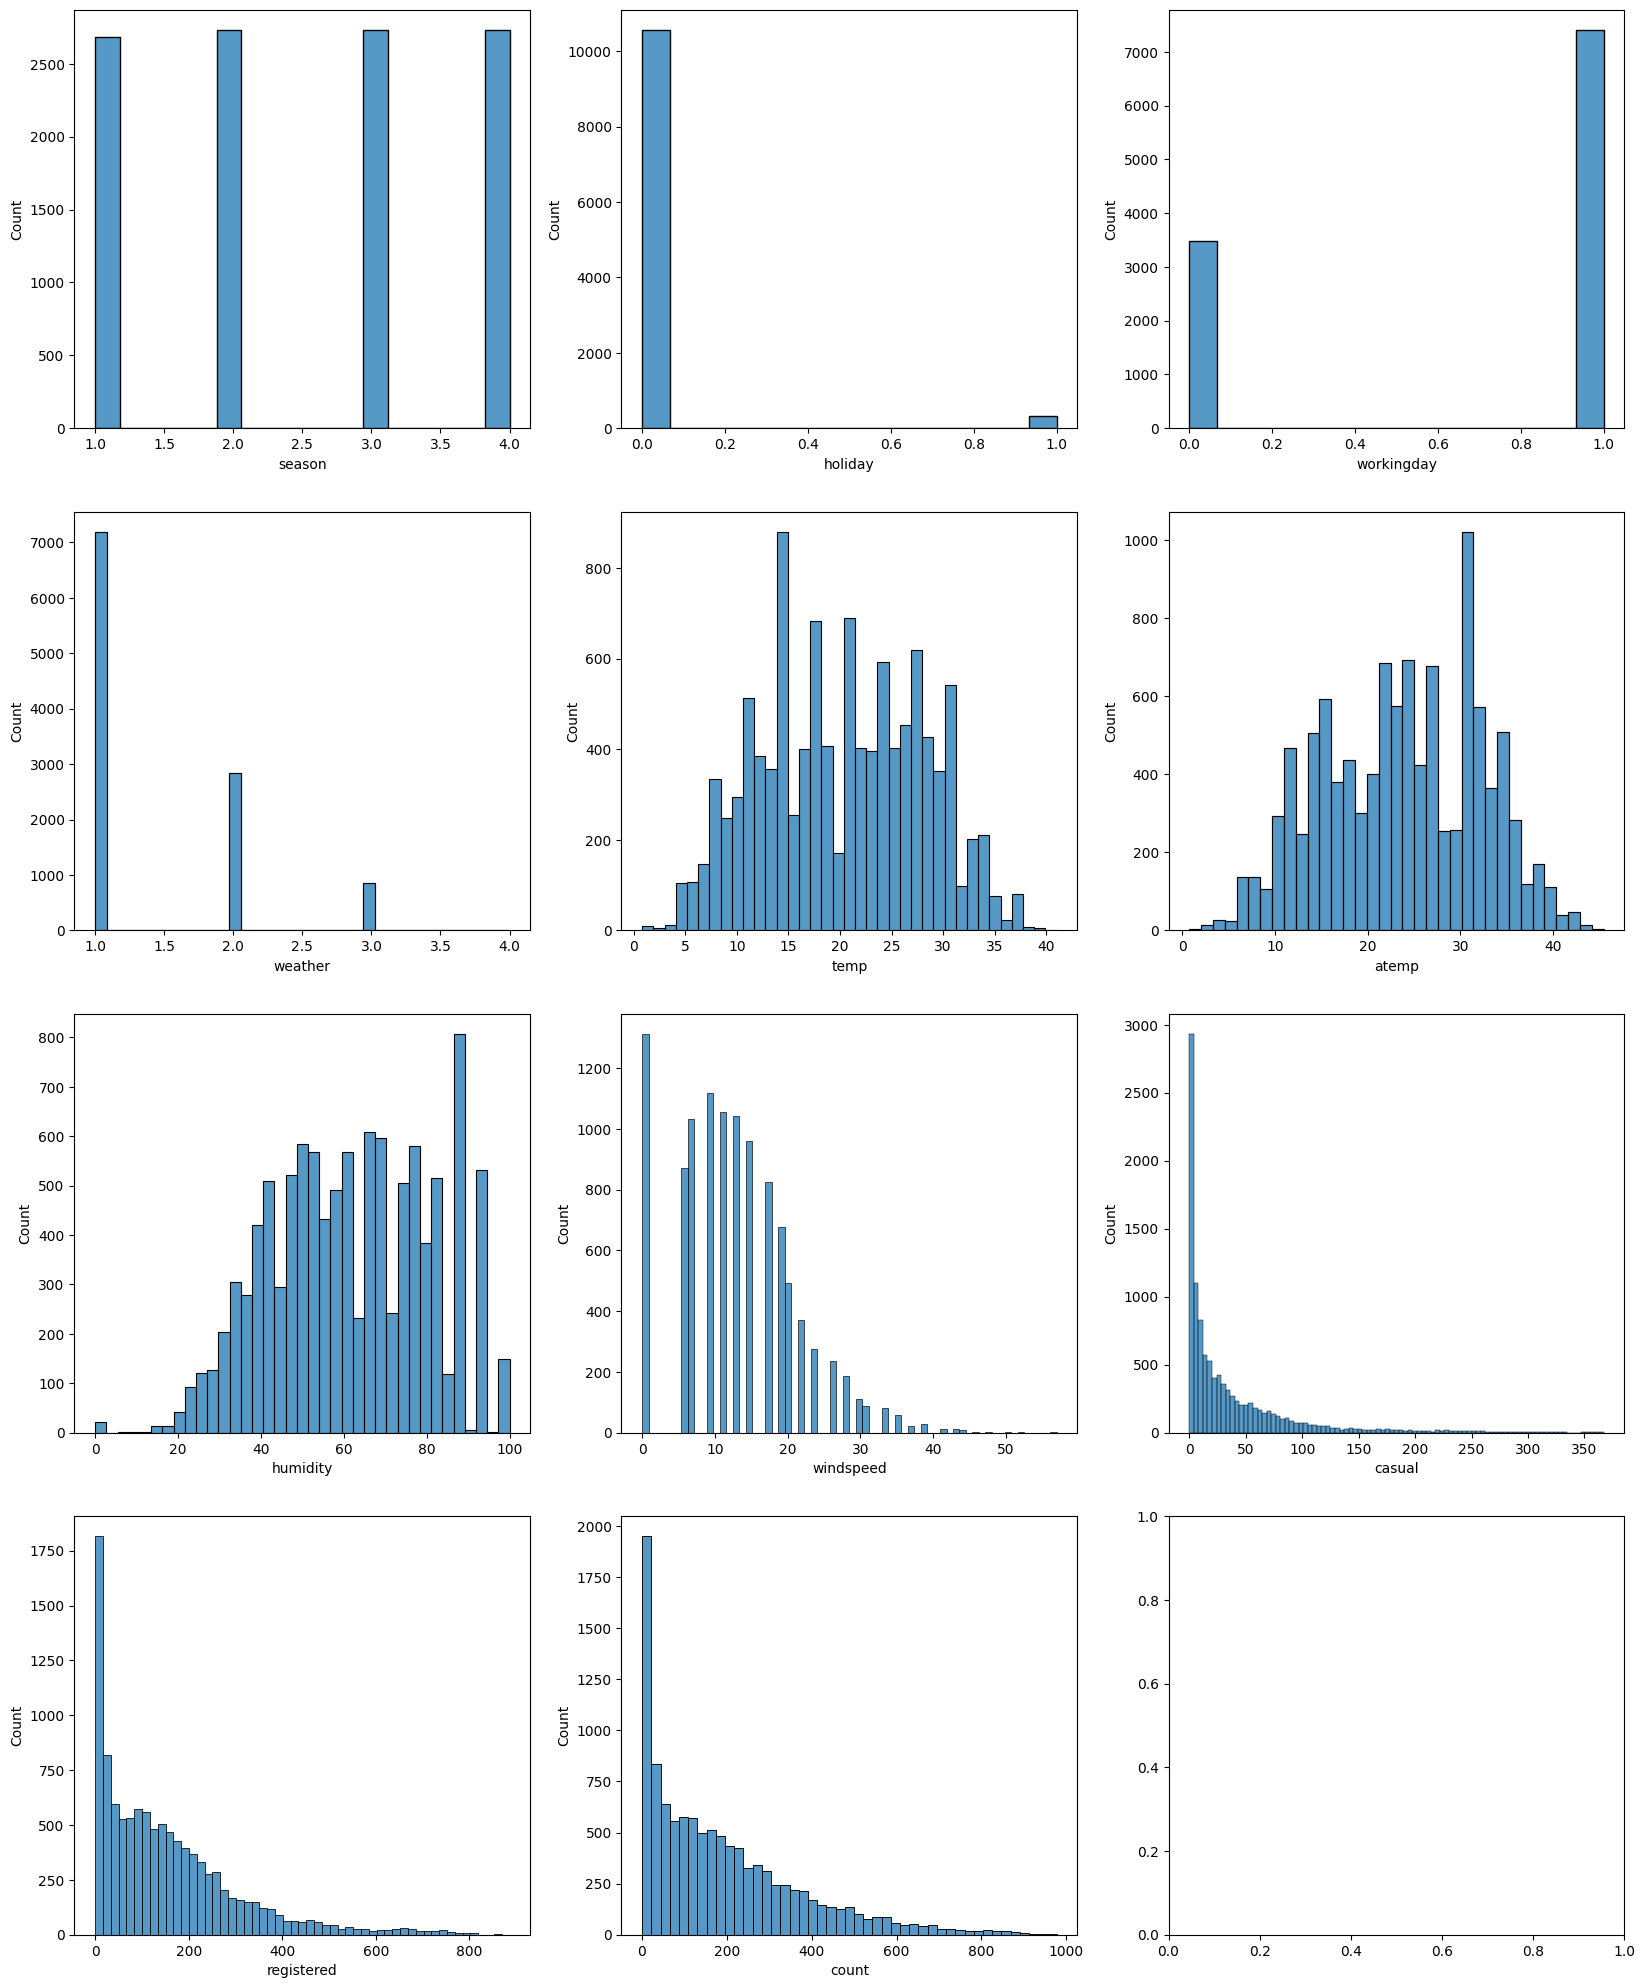

In [9]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, _)) = plt.subplots(4, 3, figsize=(20, 25))

sns.histplot(df['season'], ax=ax1)
sns.histplot(df['holiday'], ax=ax2)
sns.histplot(df['workingday'], ax=ax3)
sns.histplot(df['weather'], ax=ax4)
sns.histplot(df['temp'], ax=ax5)
sns.histplot(df['atemp'], ax=ax6)
sns.histplot(df['humidity'], ax=ax7)
sns.histplot(df['windspeed'], ax=ax8)
sns.histplot(df['casual'], ax=ax9)
sns.histplot(df['registered'], ax=ax10)
sns.histplot(df['count'], ax=ax11)

plt.show()

Drop specific columns: unnamed is the column name, 0 is the index value

In [10]:
# df.drop(columns=['Unnamed: 0'], inplace=True)

Determine all the unique values within a column

In [11]:
all_seasons = df['season'].unique()
all_seasons

array([1, 2, 3, 4], dtype=int64)

Check how many missing values are in a specific columns

In [12]:
missing_data = df['temp'].isnull().sum()
missing_data

0

Change datatype of columns

In [13]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['atemp'] = df['atemp'].astype('int')

Create columns by extracting the year, month, and day from the datetime value

The 1, 2, and 3 specify where the columns are placed within the dataframe

In [14]:
df.insert(1, 'year', df['datetime'].dt.year)
df.insert(2, 'month', df['datetime'].dt.month)
df.insert(3, 'day', df['datetime'].dt.day)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   year        10886 non-null  int32         
 2   month       10886 non-null  int32         
 3   day         10886 non-null  int32         
 4   season      10886 non-null  int64         
 5   holiday     10886 non-null  int64         
 6   workingday  10886 non-null  int64         
 7   weather     10886 non-null  int64         
 8   temp        10886 non-null  float64       
 9   atemp       10886 non-null  int32         
 10  humidity    10886 non-null  int64         
 11  windspeed   10886 non-null  float64       
 12  casual      10886 non-null  int64         
 13  registered  10886 non-null  int64         
 14  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(8)
memory usage: 1.1

In [16]:
df.columns

Index(['datetime', 'year', 'month', 'day', 'season', 'holiday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

Dropping unwanted columns

In [17]:
# df.drop([7,22], axis=0, inplace=True)
# df.drop(df[df['Product'].isnull()].index, axis=0, inplace=True)
# df.drop(df[df['Product'].isnull() & df['Region'].isnull()].index, axis=0, inplace=True)

Imputation (Filling Null values)

In [18]:
# df['Region'] = df['Region'].fillna("Other")
# df['Price'] = df['Price'].fillna(df['Price'].median())
# df.dropna()

Imputation (replacing a specific value)

In [19]:
# record['STATUS_VALUE'] = record['STATUS'].map({'A':0, 'B': 1,'C':2}).astype(int)

Imputation (Filling with the top 5 values for a categorical variable)

In [20]:
'''top_products = df['Product'].value_counts().nlargest(5).index.tolist() # exracting top five most frequent products with count

def fill_missing_product(product): # function to fill in empty cells in products randomly with top five values 
    if pd.isnull(product):
        return np.random.choice(top_products)
    else:
        return product

df['Product'] = df['Product'].apply(fill_missing_product)'''

"top_products = df['Product'].value_counts().nlargest(5).index.tolist() # exracting top five most frequent products with count\n\ndef fill_missing_product(product): # function to fill in empty cells in products randomly with top five values \n    if pd.isnull(product):\n        return np.random.choice(top_products)\n    else:\n        return product\n\ndf['Product'] = df['Product'].apply(fill_missing_product)"

# RUN ALL THE CODE AGAIN DIPSHIT FUCKERS

Use the z-score to determine which values for your target variable are outliers

In [21]:
z_scores = stats.zscore(df['count'])
outliers_mask = np.abs(z_scores) > 3
outliers = df[outliers_mask]
# print(outliers)

# THIS IS YOUR LAST CHANCE, RUN THE CODE AGAIN OR WATER WILL BE THROWN

Remove the outliers

In [22]:
df = df[~outliers_mask]

In [23]:
df[df['weather'] > 3]

,datetime,year,month,day,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,2012,1,9,1,0,1,4,8.2,11,86,6.0032,6,158,164


In [24]:
df.drop([5631], axis=0, inplace=True)

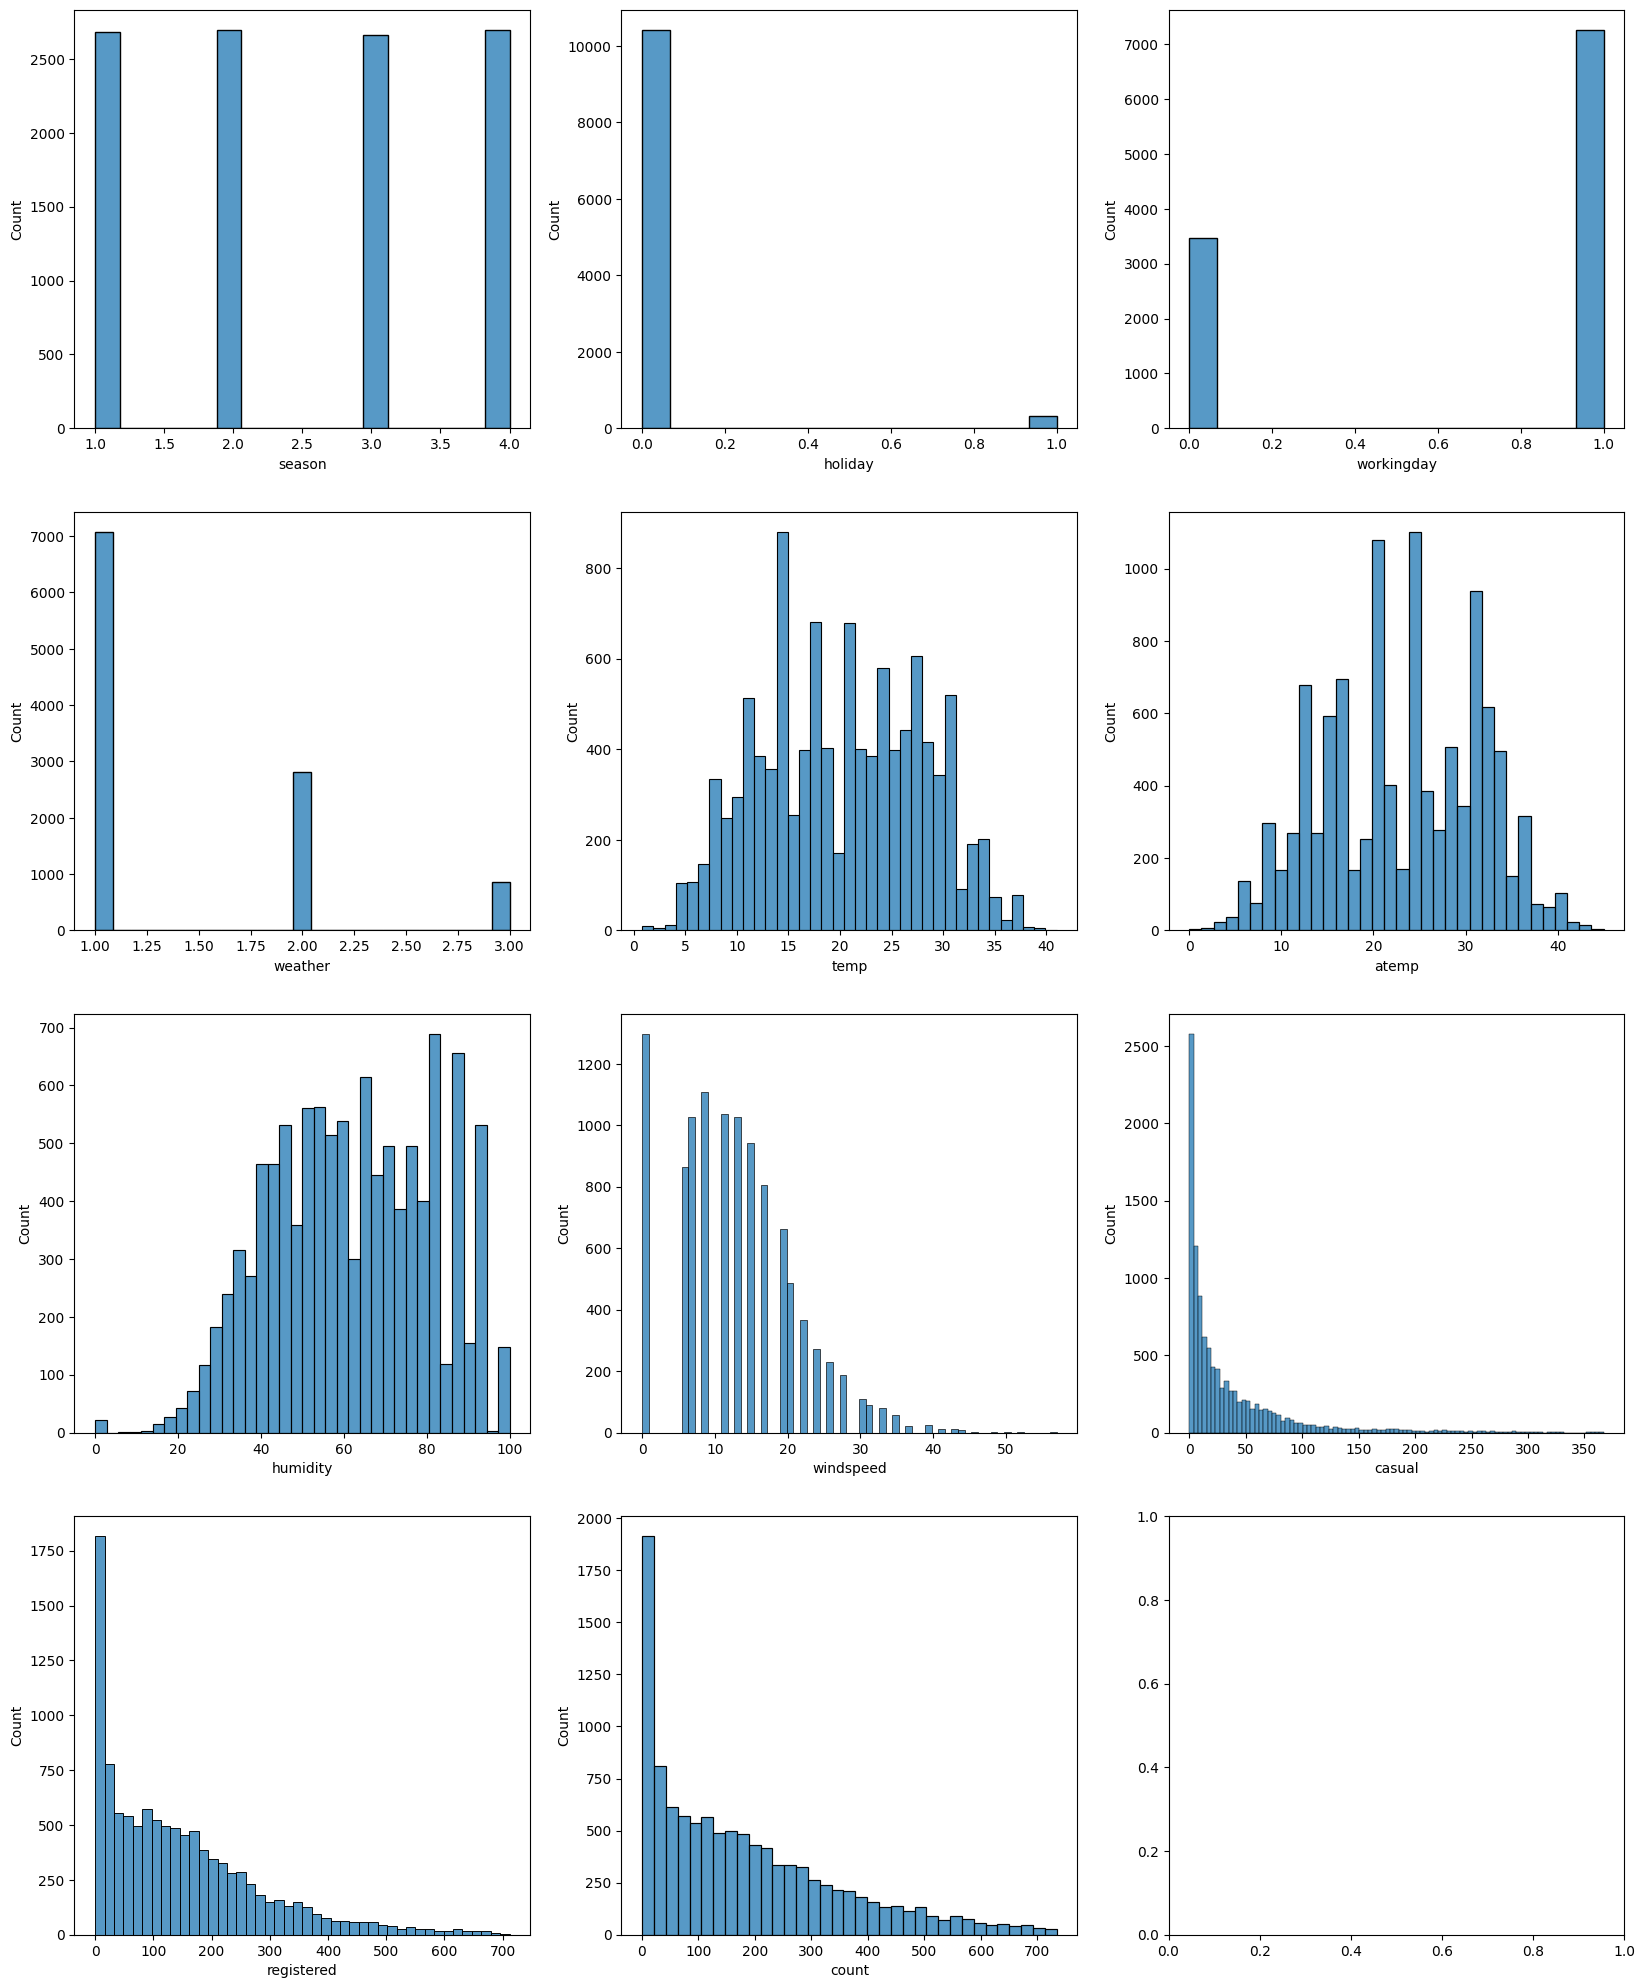

In [25]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, _)) = plt.subplots(4, 3, figsize=(20, 25))

sns.histplot(df['season'], ax=ax1)
sns.histplot(df['holiday'], ax=ax2)
sns.histplot(df['workingday'], ax=ax3)
sns.histplot(df['weather'], ax=ax4)
sns.histplot(df['temp'], ax=ax5)
sns.histplot(df['atemp'], ax=ax6)
sns.histplot(df['humidity'], ax=ax7)
sns.histplot(df['windspeed'], ax=ax8)
sns.histplot(df['casual'], ax=ax9)
sns.histplot(df['registered'], ax=ax10)
sns.histplot(df['count'], ax=ax11)

plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10738 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10738 non-null  datetime64[ns]
 1   year        10738 non-null  int32         
 2   month       10738 non-null  int32         
 3   day         10738 non-null  int32         
 4   season      10738 non-null  int64         
 5   holiday     10738 non-null  int64         
 6   workingday  10738 non-null  int64         
 7   weather     10738 non-null  int64         
 8   temp        10738 non-null  float64       
 9   atemp       10738 non-null  int32         
 10  humidity    10738 non-null  int64         
 11  windspeed   10738 non-null  float64       
 12  casual      10738 non-null  int64         
 13  registered  10738 non-null  int64         
 14  count       10738 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(8)
memory usage: 1.1 MB


In [27]:
df.describe()

,datetime,year,month,day,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10738,10738.000000,10738.000000,10738.000000,10738.000000,10738.000000,10738.000000,10738.000000,10738.000000,10738.000000,10738.000000,10738.000000,10738.000000,10738.000000,10738.000000
mean,2011-12-24 05:58:09.364872704,2011.495064,6.505867,9.983330,2.501118,0.028963,0.676755,1.420469,20.131619,23.079344,62.047402,12.788338,35.222760,147.782827,183.005588
min,2011-01-01 00:00:00,2011.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-06-19 18:15:00,2011.000000,4.000000,5.000000,2.000000,0.000000,0.000000,1.000000,13.940000,16.000000,47.000000,7.001500,4.000000,35.000000,41.000000
50%,2011-12-17 18:30:00,2011.000000,6.000000,10.000000,2.000000,0.000000,1.000000,1.000000,20.500000,24.000000,62.000000,12.998000,16.000000,116.000000,141.000000
75%,2012-06-17 15:45:00,2012.000000,10.000000,15.000000,4.000000,0.000000,1.000000,2.000000,26.240000,31.000000,78.000000,16.997900,47.000000,217.000000,276.000000
max,2012-12-19 23:00:00,2012.000000,12.000000,19.000000,4.000000,1.000000,1.000000,3.000000,41.000000,45.000000,100.000000,56.996900,367.000000,712.000000,734.000000
std,NaN,0.499999,3.456244,5.478042,1.119001,0.167709,0.467737,0.634498,7.777081,8.488587,19.240871,8.171193,49.548387,136.376912,166.689090


# Exploratory Data Analysis

### Univariate Analysis

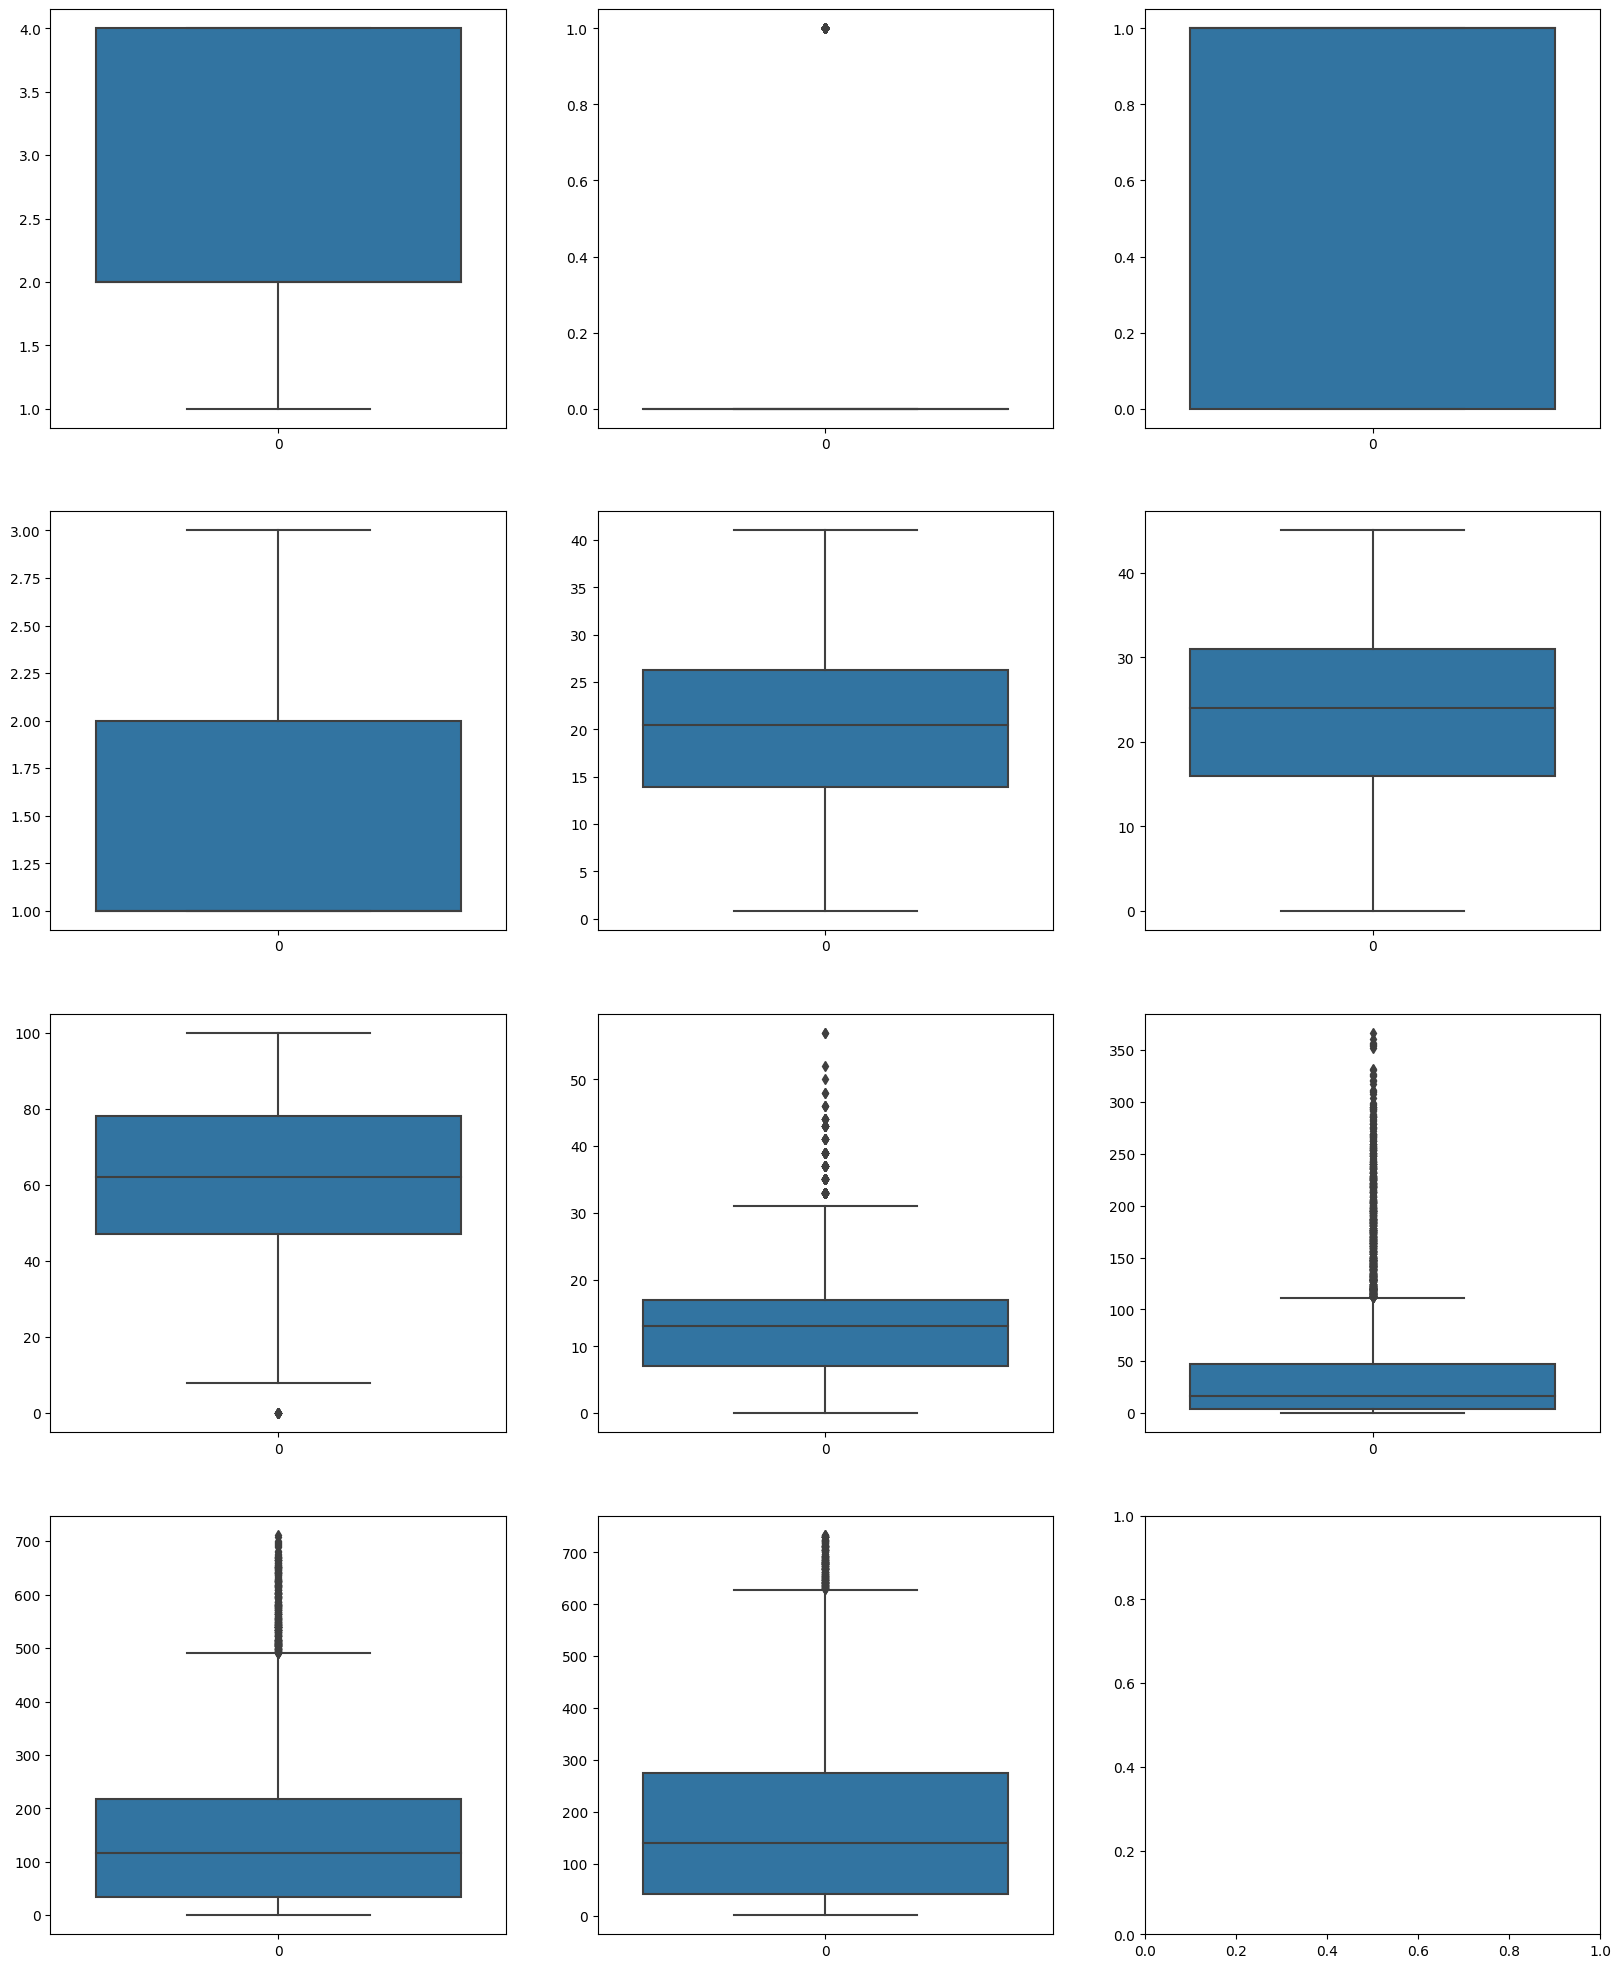

In [28]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, _)) = plt.subplots(4, 3, figsize=(20, 25))

sns.boxplot(df['season'], ax=ax1)
sns.boxplot(df['holiday'], ax=ax2)
sns.boxplot(df['workingday'], ax=ax3)
sns.boxplot(df['weather'], ax=ax4)
sns.boxplot(df['temp'], ax=ax5)
sns.boxplot(df['atemp'], ax=ax6)
sns.boxplot(df['humidity'], ax=ax7)
sns.boxplot(df['windspeed'], ax=ax8)
sns.boxplot(df['casual'], ax=ax9)
sns.boxplot(df['registered'], ax=ax10)
sns.boxplot(df['count'], ax=ax11)

plt.show()

Removing all records where humidity is equal to 0

In [103]:
df[df['humidity'] == 0]

,datetime,year,month,day,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_bin
1091,2011-03-10 00:00:00,2011,3,10,1,0,1,3,13.94,15,0,16.9979,3,0,3,0
1092,2011-03-10 01:00:00,2011,3,10,1,0,1,3,13.94,15,0,16.9979,0,2,2,0
1093,2011-03-10 02:00:00,2011,3,10,1,0,1,3,13.94,15,0,16.9979,0,1,1,0
1094,2011-03-10 05:00:00,2011,3,10,1,0,1,3,14.76,17,0,12.9980,1,2,3,0
1095,2011-03-10 06:00:00,2011,3,10,1,0,1,3,14.76,16,0,22.0028,0,12,12,0
1096,2011-03-10 07:00:00,2011,3,10,1,0,1,3,15.58,19,0,15.0013,1,36,37,0
1097,2011-03-10 08:00:00,2011,3,10,1,0,1,3,15.58,19,0,19.0012,1,43,44,1
1098,2011-03-10 09:00:00,2011,3,10,1,0,1,3,16.40,20,0,15.0013,1,23,24,0
1099,2011-03-10 10:00:00,2011,3,10,1,0,1,3,16.40,20,0,11.0014,0,17,17,0
1100,2011-03-10 11:00:00,2011,3,10,1,0,1,3,16.40,20,0,16.9979,6,5,11,0


In [113]:
df[df['humidity'] < 10]

,datetime,year,month,day,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_bin
852,2011-02-18 23:00:00,2011,2,18,1,0,1,1,21.32,25,8,19.0012,16,61,77,1
1091,2011-03-10 00:00:00,2011,3,10,1,0,1,3,13.94,15,0,16.9979,3,0,3,0
1092,2011-03-10 01:00:00,2011,3,10,1,0,1,3,13.94,15,0,16.9979,0,2,2,0
1093,2011-03-10 02:00:00,2011,3,10,1,0,1,3,13.94,15,0,16.9979,0,1,1,0
1094,2011-03-10 05:00:00,2011,3,10,1,0,1,3,14.76,17,0,12.9980,1,2,3,0
1095,2011-03-10 06:00:00,2011,3,10,1,0,1,3,14.76,16,0,22.0028,0,12,12,0
1096,2011-03-10 07:00:00,2011,3,10,1,0,1,3,15.58,19,0,15.0013,1,36,37,0
1097,2011-03-10 08:00:00,2011,3,10,1,0,1,3,15.58,19,0,19.0012,1,43,44,1
1098,2011-03-10 09:00:00,2011,3,10,1,0,1,3,16.40,20,0,15.0013,1,23,24,0
1099,2011-03-10 10:00:00,2011,3,10,1,0,1,3,16.40,20,0,11.0014,0,17,17,0


In [114]:
df.drop(df[df['humidity'] == 0].index, axis=0, inplace=True)

In [115]:
df[df['humidity'] < 10]

,datetime,year,month,day,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_bin
852,2011-02-18 23:00:00,2011,2,18,1,0,1,1,21.32,25,8,19.0012,16,61,77,1


Classifying a day as too hot, so so, a good day through the use of the temp and hum variable

In [116]:
def good_bad(temp,hum):
    if temp > 25 and hum > 70:
        return 'too hot'
    elif temp <=25 and hum >= 50 and hum <= 70:
        return 'so so day'
    else:
        return 'good day'

In [118]:
df['day_type'] = df.apply(lambda x: good_bad(x['temp'], x['humidity']), axis=1)

In [119]:
def application_function(x):
    good_bad(x['temp'], x['humidity'])

In [120]:
df.head()

,datetime,year,month,day,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_bin,day_type
0,2011-01-01 00:00:00,2011,1,1,1,0,0,1,9.84,14,81,0.0,3,13,16,0,good day
1,2011-01-01 01:00:00,2011,1,1,1,0,0,1,9.02,13,80,0.0,8,32,40,0,good day
2,2011-01-01 02:00:00,2011,1,1,1,0,0,1,9.02,13,80,0.0,5,27,32,0,good day
3,2011-01-01 03:00:00,2011,1,1,1,0,0,1,9.84,14,75,0.0,3,10,13,0,good day
4,2011-01-01 04:00:00,2011,1,1,1,0,0,1,9.84,14,75,0.0,0,1,1,0,good day


Mapping the seasons into their proper name

In [123]:
season_mapping = {1:'winter', 2:'spring', 3:'summer', 4:'fall'}
df['season'] = df['season'].map(season_mapping)

### Bivariate Analysis

In [29]:
df.columns

Index(['datetime', 'year', 'month', 'day', 'season', 'holiday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

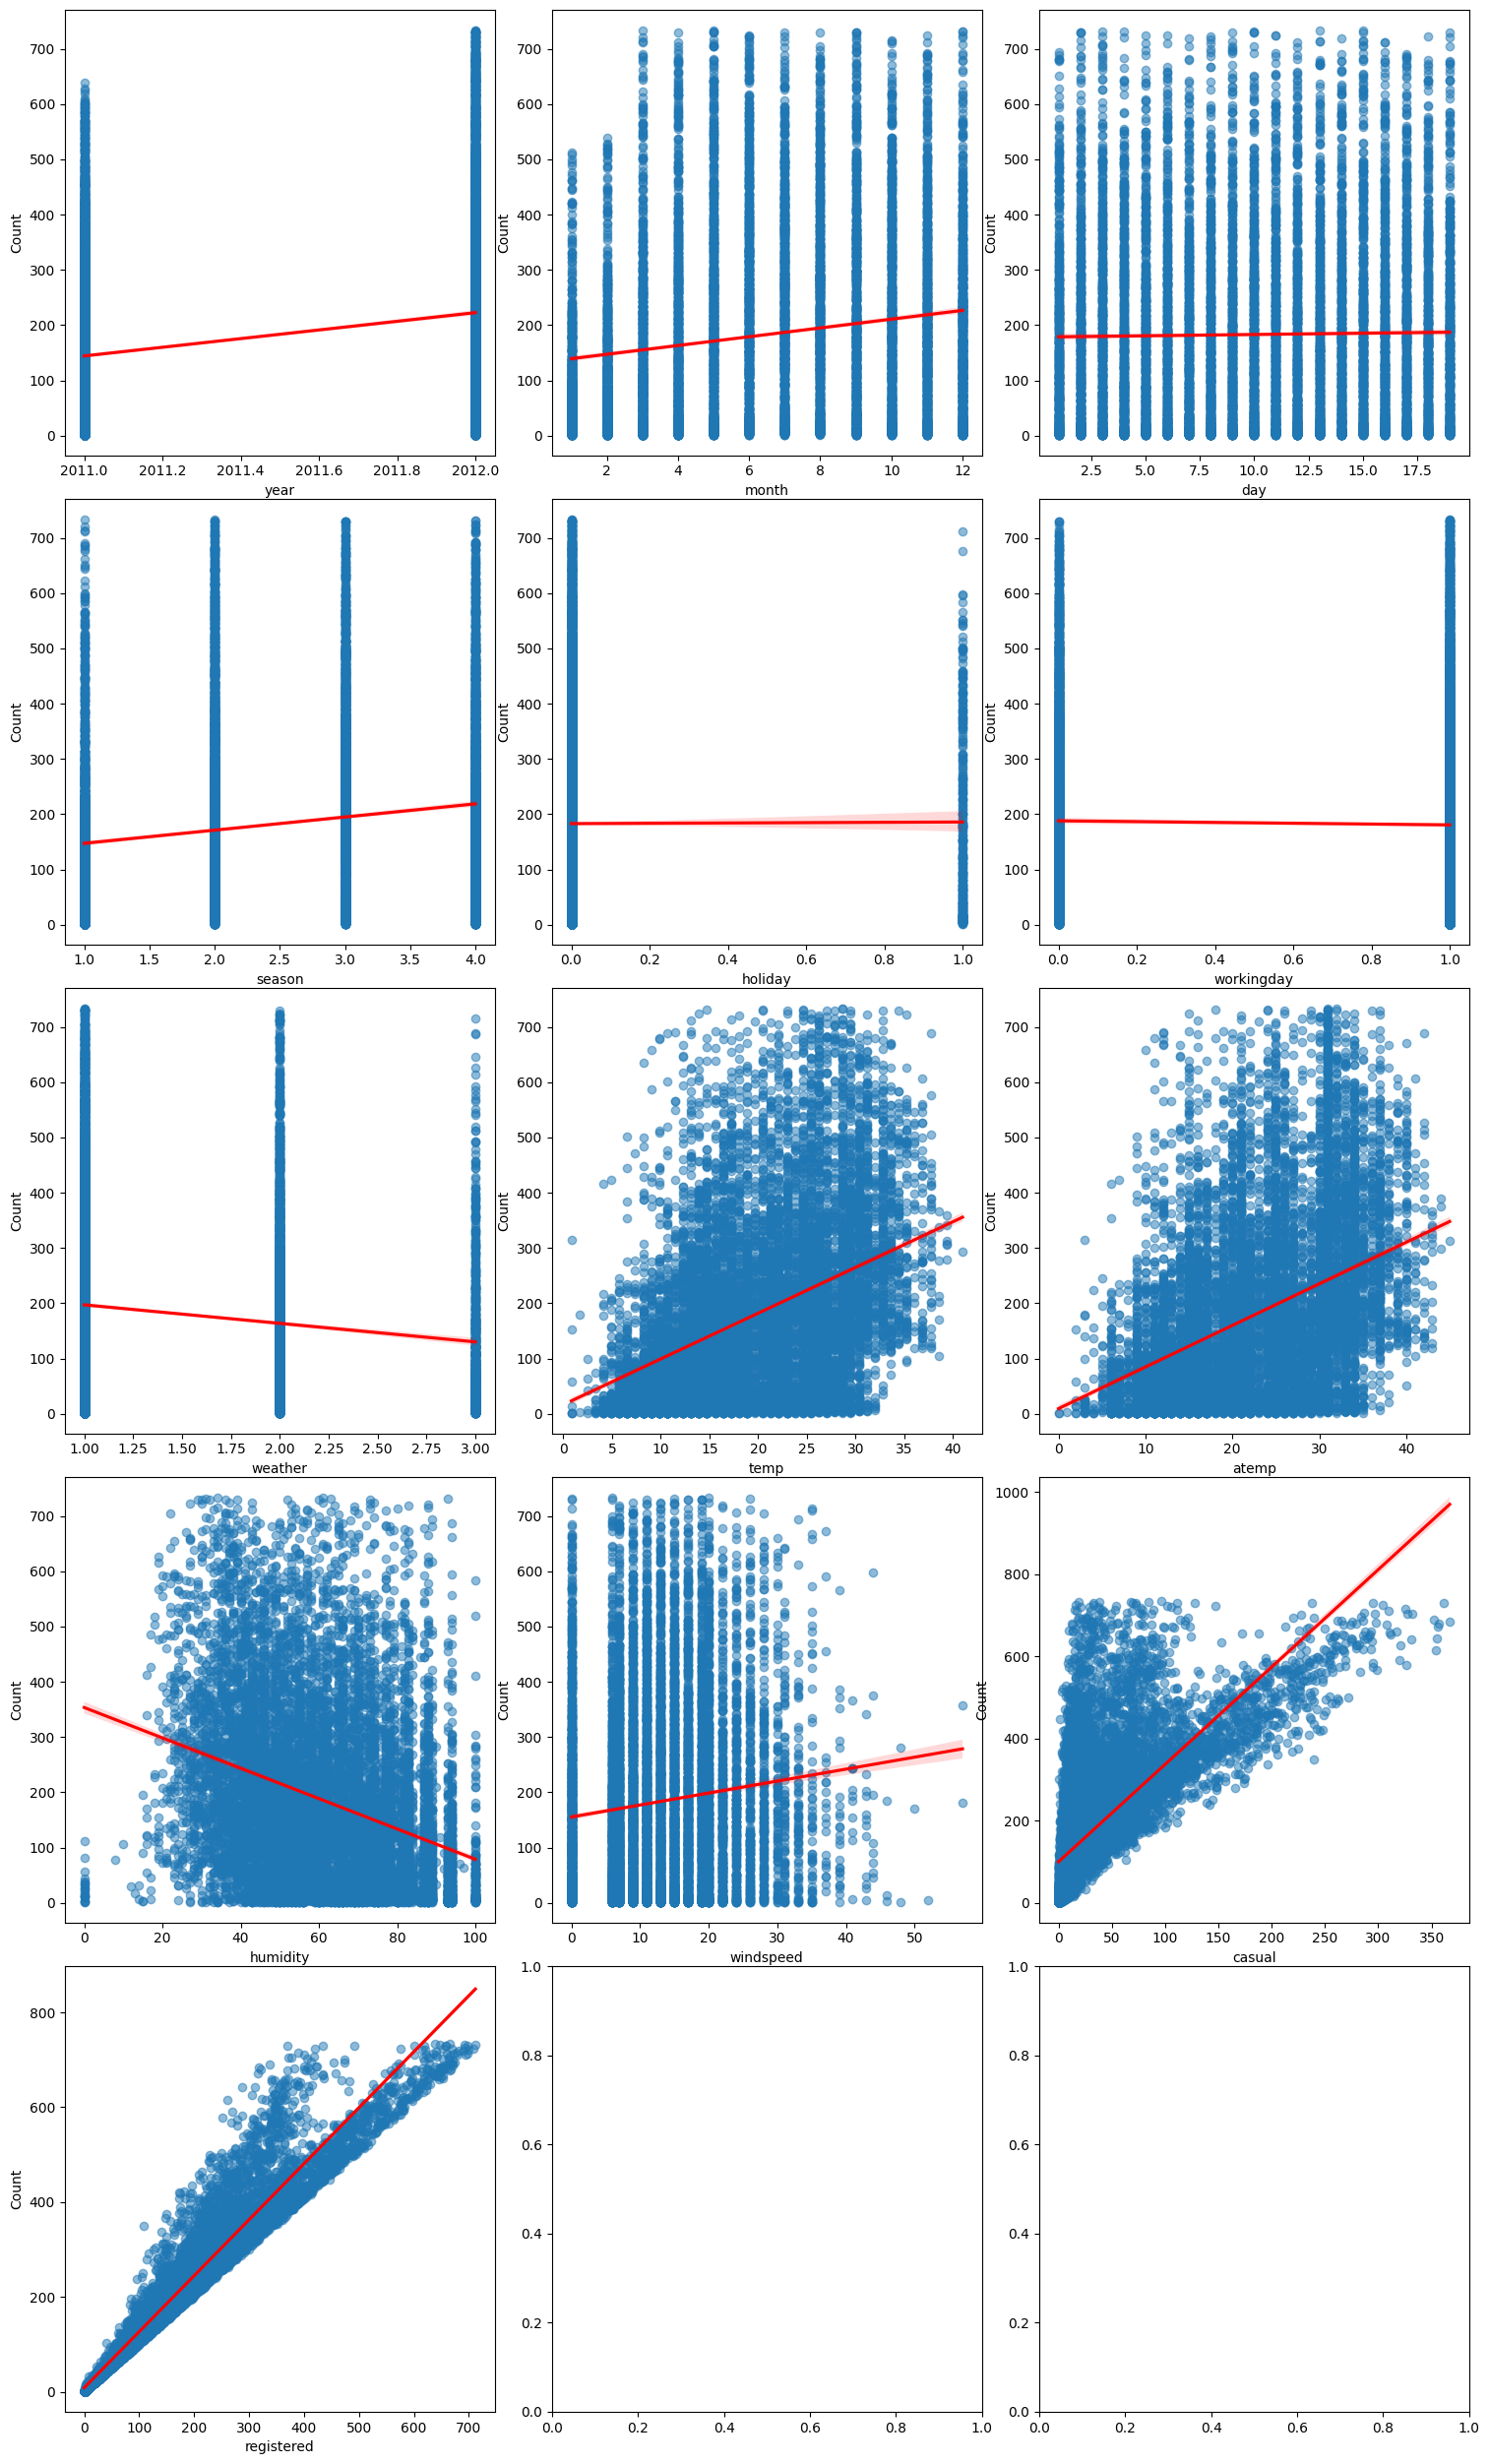

In [30]:
columns = df.columns.drop(['datetime', 'count'])

num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]  
    sns.regplot(x=column, y='count', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

plt.show()

<Axes: xlabel='season', ylabel='windspeed'>

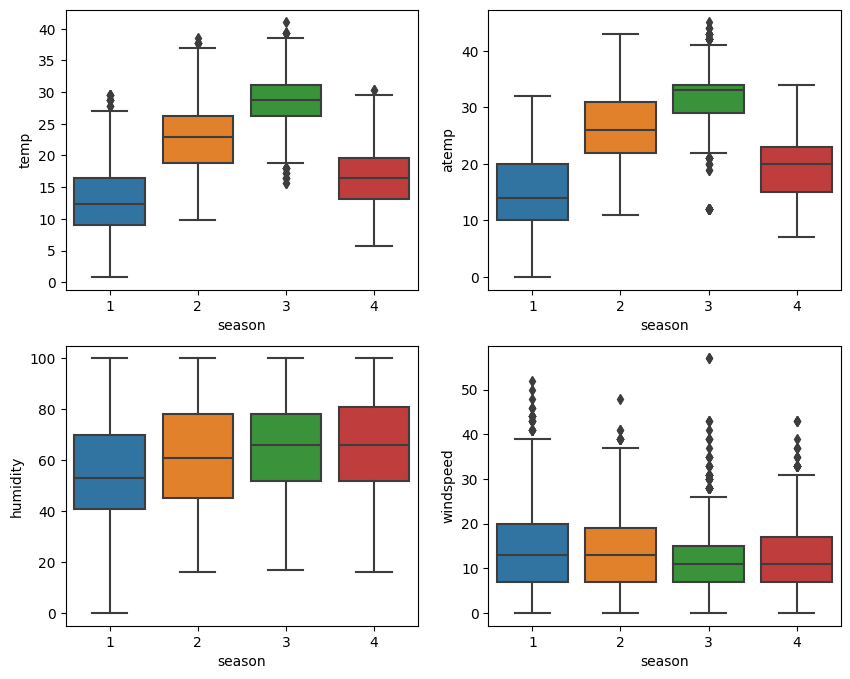

In [31]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='season',y='temp', data=df, ax=ax1)
sns.boxplot(x='season',y='atemp', data=df, ax=ax2)
sns.boxplot(x='season',y='humidity', data=df, ax=ax3)
sns.boxplot(x='season',y='windspeed', data=df, ax=ax4)

# Data Engineering

### Variable Creation

In [76]:
df['count'].describe()

count    10738.000000
mean       183.005588
std        166.689090
min          1.000000
25%         41.000000
50%        141.000000
75%        276.000000
max        734.000000
Name: count, dtype: float64

In [90]:
def count_bin(x):
    if x >= 0 and x <= 41:
        return 0
    elif x > 41 and x <= 141:
        return 1
    elif x > 141 and x <= 276:
        return 2
    elif x > 276:
        return 3

In [91]:
df['count_bin'] = df['count'].apply(count_bin)

In [93]:
df['count_bin'].describe(include = 'all')

count    10738.000000
mean         1.497579
std          1.119499
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: count_bin, dtype: float64

### Visualization

# Model Creation

In [32]:
df.columns

Index(['datetime', 'year', 'month', 'day', 'season', 'holiday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

## OLS

Check which variables have a P value of over 0.05 and remove them

In [124]:
results = ols("count ~ year + month + season + workingday + atemp + humidity + windspeed + day_type", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     456.4
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:46:17   Log-Likelihood:                -67970.
No. Observations:               10716   AIC:                         1.360e+05
Df Residuals:                   10704   BIC:                         1.361e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.294e+

In [125]:
pred_vals = results.predict(df[['year', 'month', 'season', 'workingday', 'atemp', 'humidity', 'windspeed', 'day_type']])
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['count']], axis=1)
res['error'] = res['y_hat'] - res['count']
res['sq_error'] = res['error']**2
RMSE = np.sqrt(res['sq_error'].mean())
print("RMSE:", RMSE)

RMSE: 137.535741380814


### Begin Splitting the data

In [35]:
df.columns

Index(['datetime', 'year', 'month', 'day', 'season', 'holiday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

In [127]:
cat_columns = ['year', 'month', 'season', 'workingday', 'day_type']
num_columns = ['atemp', 'humidity', 'windspeed']
target = 'count'

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)

In [38]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

## Linear Regression

In [39]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [40]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['year', 'month', 'season',
                                                   'workingday']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['atemp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', LinearRegression())])

In [41]:
pred = linear_regression.predict(X_test)

In [42]:
RMSE = np.sqrt(mean_squared_error(pred, y_test))
print('RMSE:' ,RMSE)

r2 = r2_score(y_test, pred)
print("R-squared value:", r2)

RMSE: 133.9289296475274
R-squared value: 0.31856957622501103


## Ridge Regression

In [43]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [44]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['year', 'month', 'season',
                                                   'workingday']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['atemp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', Ridge(alpha=3.0))])

In [45]:
pred_ridge = ridge_regression.predict(X_test)

In [46]:
RMSE = np.sqrt(mean_squared_error(pred_ridge, y_test))
print('RMSE:' ,RMSE)

r2 = r2_score(y_test, pred_ridge)
print("R-squared value:", r2)

RMSE: 133.81167794427768
R-squared value: 0.31976220732013527


## Lasso Regression

In [47]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [48]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['year', 'month', 'season',
                                                   'workingday']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['atemp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', Lasso())])

In [49]:
lasso_pred = lasso_regression.predict(X_test)

In [50]:
RMSE = np.sqrt(mean_squared_error(lasso_pred, y_test))
print('RMSE:', RMSE)

r2 = r2_score(y_test, lasso_pred)
print("R-squared value:", r2)

RMSE: 134.50798927452584
R-squared value: 0.3126643266741368


## Elastic Net

In [51]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [52]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['year', 'month', 'season',
                                                   'workingday']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['atemp', 'humidity',
                                                   'windspeed'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [53]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [54]:
RMSE = np.sqrt(mean_squared_error(elasticnet_pred, y_test))
print('RMSE', RMSE)

r2 = r2_score(y_test, elasticnet_pred)
print("R-squared value:", r2)

RMSE 136.79490448631321
R-squared value: 0.289093369819297


## Logistic Regression

In [57]:
df.columns

Index(['datetime', 'year', 'month', 'day', 'season', 'holiday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count', 'count_bin'],
      dtype='object')

In [128]:
columns = df[['year', 'month', 'season', 'atemp', 'humidity', 'windspeed', 'workingday', 'day_type']]

In [129]:
X = columns.select_dtypes(include='number')
y = df['count_bin']

In [130]:
scaler = StandardScaler()
model_X = scaler.fit(X)
X_scaled = model_X.transform(X)

X_train, X_test, y_train, y_test = train_test_split (X_scaled, y, random_state=42, test_size=0.3, shuffle=True)

In [131]:
log_reg = linear_model.LogisticRegression(solver = 'newton-cg', max_iter=50)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [132]:
print("Logistic Regression Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Logistic Regression Model Accuracy (in %): 43.20373250388803


In [133]:
from sklearn.metrics import confusion_matrix, classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.54      0.46       783
           1       0.44      0.32      0.37       847
           2       0.36      0.26      0.30       812
           3       0.49      0.62      0.55       773

    accuracy                           0.43      3215
   macro avg       0.43      0.44      0.42      3215
weighted avg       0.43      0.43      0.42      3215



## K Nearest Neighbours

In [95]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [96]:
print("KNN Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

KNN Model Accuracy (in %): 45.034140285536935


In [97]:
print("Classification Report:")
print(classification_report(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.53      0.53       826
           2       0.40      0.40      0.40       825
           3       0.34      0.34      0.34       804
           4       0.49      0.51      0.50       767

    accuracy                           0.44      3222
   macro avg       0.44      0.44      0.44      3222
weighted avg       0.44      0.44      0.44      3222



takes like 6 min to run

In [98]:
# params knn
params_knn = {'n_neighbors': list(range(1,500)), 'weights': ['uniform', 'distance'], 'metric': ['l1', 'euclidean', 'manhattan', 'sokalsneath', 'hamming', 'sokalmichener', 'rogerstanimoto', 'braycurtis', 'dice', 'jaccard', 'pyfunc', 'haversine', 'matching', 'cityblock', 'correlation', 'l2', 'nan_euclidean', 'chebyshev', 'p', 'wminkowski', 'minkowski', 'cosine', 'infinity', 'russellrao', 'seuclidean', 'canberra', 'kulsinski', 'sqeuclidean', 'yule', 'mahalanobis'] }
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, n_iter=100, scoring='accuracy')

randomsearch_knn.fit(X_train, y_train)

print("Best parameters from RandomSearch: ", randomsearch_knn.best_params_)

# Best parameters from RandomSearch:  {'weights': 'distance', 'n_neighbors': 151, 'metric': 'manhattan'}

Best parameters from RandomSearch:  {'weights': 'distance', 'n_neighbors': 151, 'metric': 'manhattan'}


In [100]:
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)
cv_scores_knn = cross_val_score(knn_best, X_train, y_train, cv=5, scoring='accuracy')
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)

In [101]:
print(cv_scores_knn)
print("\nK-Nearest Neighbors Metrics: ")
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))

[0.47473404 0.47638057 0.47571524 0.48303393 0.46906188]

K-Nearest Neighbors Metrics: 
Accuracy:  0.4823091247672253


## Decision Tree

In [73]:
d_tree = DecisionTreeClassifier(random_state=42, max_depth=8)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

In [74]:
print("Decsision Tree Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Decsision Tree Model Accuracy (in %): 45.034140285536935


In [69]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.46      0.67      0.54       826
           2       0.45      0.31      0.37       825
           3       0.37      0.30      0.33       804
           4       0.51      0.53      0.52       767

    accuracy                           0.45      3222
   macro avg       0.45      0.45      0.44      3222
weighted avg       0.45      0.45      0.44      3222



## Random Forest

In [70]:
rforest = RandomForestClassifier(n_estimators = 200)
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)

In [72]:
print("Random Forest Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Random Forest Model Accuracy (in %): 48.26194909993793


In [71]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.61      0.58       826
           2       0.45      0.41      0.43       825
           3       0.38      0.36      0.37       804
           4       0.53      0.55      0.54       767

    accuracy                           0.48      3222
   macro avg       0.48      0.48      0.48      3222
weighted avg       0.48      0.48      0.48      3222



# Model Evaluation

For linear regression models look at the r squared value and Root Mean Squared Error

r squared is the percentage of the dependent variable variations that a linear model explains. 0% represents a model that does not explain any of the variation in the reponse variable around the mean

Root mean squared error (RMSE) estimates the deviation of the actual y values from the regression line



For logistic regression we look at the precision score, recall score, f1 score, and accuracy score

Accuracy is the number of correct predictions over the total predictions

Precision is the number of true positives divided by the number of true positives plus the number of false positives. usefull measure of the success of prediction when the classes are very imbalanced

Recall is the number of true positives divided by the number of true positives plus the number of false negatives. Represents the ability of the model to find all positive samples

F1 score measures a models accuracy. Combines the precision and recall scores of a model. 

# Model Fine Tuning

# Final Recommendation

Choosing a model with the highest scores from the model evaluation section is a good start 

However other factors can be considered such as computing power, whether the model makes assumptions such as the assumption of linnearity, and the needs of the business you are reccomending to 